In [3]:
import pandas as pd
import numpy as np
import os
import time
from sklearn.decomposition import PCA, IncrementalPCA

## CHANGE PATH HERE THEN EXECUTE CELLS UNTIL YOU SEE 'START HERE"

In [4]:
base_dir = r'/Users/jimmy/Projects/bravo-launch/bravo-wx-launch/test-runs/test-run-20220722-0845 (complete)'

In [5]:
df_list = []
df = pd.DataFrame()
for filename in os.listdir(base_dir):
    with open(os.path.join(base_dir, filename), 'r') as f:
        df_list.append(pd.read_csv(f))
        time.sleep(0.5) # to be gotten rid of if your jupyter notebook config can handle it
        
        
print(df_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
for df in df_list:
    df.set_index('Unnamed: 0', inplace=True)

In [7]:
big_boy_df = pd.DataFrame(df_list[0])

for df in df_list[1:]:
#     try:
#         df.set_index('Unnamed: 0', inplace=True)
#     except:
#         pass
    big_boy_df = pd.concat([big_boy_df,df])
    

    

In [8]:
big_boy_df.scrub_id.value_counts()

0    5488
1    1372
Name: scrub_id, dtype: int64

In [9]:
big_boy_df.columns

Index(['Balloon Wind Speed', 'Balloon Precipitable Water', 'Field Mill Mean',
       'Sum of Lightning Strike Signals', 'Count of Lightning Strikes',
       'Rain Gauge Inches', 'Avg Wind Speed 0002 NW  SE',
       'Avg Wind Speed 0002 SE  SE', 'Avg Wind Speed 0006 NW  SE',
       'Avg Wind Speed 0006 SE  SE',
       ...
       'Barometric Pressure 0110 NW  NW', 'Barometric Pressure 0110 SE  NW',
       'Barometric Pressure 0313 NE  NE', 'Barometric Pressure 0313 SW  NE',
       'Avg Wind Speed VAB 01', 'Peak Wind Speed VAB 01', 'Deviation VAB 01',
       'Temp VAB 01', 'Temperature Difference VAB 01',
       'Barometric Pressure VAB 01'],
      dtype='object', length=175)

In [10]:
len(df_list)

140

In [11]:
# if no rainfall
try:
    big_boy_df.drop(columns='Rain Gauge Inches', inplace=True)
except:
    pass
for df in df_list:
    try:
        df.drop(columns='Rain Gauge Inches', inplace=True)
    except:
        pass

## Simulate scrub info

In [12]:
# scrubs = np.random.binomial(1, .2, 5341)
# big_boy_df['scrub'] = scrubs
# for df in df_list:
#     scrubs = np.random.binomial(1, .2, 1)
#     l = []
#     for i in range(49):
#         l.append(scrubs)
#     df['scrub'] = l

In [13]:
for col in big_boy_df.columns:
    print(big_boy_df[col].isna().value_counts())

False    5978
True      882
Name: Balloon Wind Speed, dtype: int64
False    5978
True      882
Name: Balloon Precipitable Water, dtype: int64
False    6076
True      784
Name: Field Mill Mean, dtype: int64
False    6860
Name: Sum of Lightning Strike Signals, dtype: int64
False    6860
Name: Count of Lightning Strikes, dtype: int64
False    3577
True     3283
Name: Avg Wind Speed 0002 NW  SE, dtype: int64
False    3577
True     3283
Name: Avg Wind Speed 0002 SE  SE, dtype: int64
True     3479
False    3381
Name: Avg Wind Speed 0006 NW  SE, dtype: int64
True     3479
False    3381
Name: Avg Wind Speed 0006 SE  SE, dtype: int64
True     3626
False    3234
Name: Avg Wind Speed 0110 NW  SE, dtype: int64
True     3626
False    3234
Name: Avg Wind Speed 0110 SE  SE, dtype: int64
False    3724
True     3136
Name: Avg Wind Speed 0313 NE  SW, dtype: int64
False    3724
True     3136
Name: Avg Wind Speed 0313 SW  SW, dtype: int64
False    4508
True     2352
Name: Avg Wind Speed SLC 40, dtype: int

In [14]:
df_list[0]

,Balloon Wind Speed,Balloon Precipitable Water,Field Mill Mean,Sum of Lightning Strike Signals,Count of Lightning Strikes,Avg Wind Speed 0002 NW SE,Avg Wind Speed 0002 SE SE,Avg Wind Speed 0006 NW SE,Avg Wind Speed 0006 SE SE,Avg Wind Speed 0110 NW SE,...,RWP0002 Max Height: 1.5 km Direction (var),RWP0002 Max Height: 10 km Speed (m/s),RWP0002 Max Height: 10 km Direction (var),RWP0003 Max Height: 0.8 km Speed (m/s),RWP0003 Max Height: 0.8 km Direction (var),RWP0003 Max Height: 1.5 km Speed (m/s),RWP0003 Max Height: 1.5 km Direction (var),RWP0003 Max Height: 10 km Speed (m/s),RWP0003 Max Height: 10 km Direction (var),scrub_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2015-03-01 23:50:00,14.4,5.0,177.451613,0,0,4.000000,3.666667,2.60,3.400000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-01 23:55:00,14.4,5.0,174.064516,0,0,4.000000,3.666667,3.20,3.600000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:00:00,14.4,5.0,167.935484,0,0,3.833333,3.000000,3.40,4.000000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:05:00,14.4,5.0,166.612903,0,0,3.833333,3.000000,3.40,4.000000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:10:00,14.4,5.0,170.903226,0,0,3.958333,3.111111,3.45,4.016667,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:15:00,14.4,5.0,166.161290,0,0,4.083333,3.222222,3.50,4.033333,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:20:00,14.4,5.0,166.290323,0,0,4.208333,3.333333,3.55,4.050000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:25:00,14.4,5.0,163.064516,0,0,4.333333,3.444444,3.60,4.066667,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:30:00,14.4,5.0,168.709677,0,0,4.458333,3.555556,3.65,4.083333,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
list_pca = df_list
ipca_list = []
for i,df in enumerate(list_pca):
    if len(df.index) > 10:
        ipca_list.append(df)

In [16]:
ipca_list[0]

,Balloon Wind Speed,Balloon Precipitable Water,Field Mill Mean,Sum of Lightning Strike Signals,Count of Lightning Strikes,Avg Wind Speed 0002 NW SE,Avg Wind Speed 0002 SE SE,Avg Wind Speed 0006 NW SE,Avg Wind Speed 0006 SE SE,Avg Wind Speed 0110 NW SE,...,RWP0002 Max Height: 1.5 km Direction (var),RWP0002 Max Height: 10 km Speed (m/s),RWP0002 Max Height: 10 km Direction (var),RWP0003 Max Height: 0.8 km Speed (m/s),RWP0003 Max Height: 0.8 km Direction (var),RWP0003 Max Height: 1.5 km Speed (m/s),RWP0003 Max Height: 1.5 km Direction (var),RWP0003 Max Height: 10 km Speed (m/s),RWP0003 Max Height: 10 km Direction (var),scrub_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2015-03-01 23:50:00,14.4,5.0,177.451613,0,0,4.000000,3.666667,2.60,3.400000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-01 23:55:00,14.4,5.0,174.064516,0,0,4.000000,3.666667,3.20,3.600000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:00:00,14.4,5.0,167.935484,0,0,3.833333,3.000000,3.40,4.000000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:05:00,14.4,5.0,166.612903,0,0,3.833333,3.000000,3.40,4.000000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:10:00,14.4,5.0,170.903226,0,0,3.958333,3.111111,3.45,4.016667,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:15:00,14.4,5.0,166.161290,0,0,4.083333,3.222222,3.50,4.033333,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:20:00,14.4,5.0,166.290323,0,0,4.208333,3.333333,3.55,4.050000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:25:00,14.4,5.0,163.064516,0,0,4.333333,3.444444,3.60,4.066667,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:30:00,14.4,5.0,168.709677,0,0,4.458333,3.555556,3.65,4.083333,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# START HERE

In [17]:
from sklearn.model_selection import train_test_split

### make time transformations here
If you are making time transformations, you should iterate through ipca_list to apply them.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

Lambda is parameter of interest

          Don't look at me iterating through a df

In [18]:
from scipy.stats import boxcox

no_transform = []
for df in ipca_list:
    for col in df:
        try:
            df.loc[:,col] = boxcox(df.loc[:,col], lmbda=0)
        except:
            pass
        
display(df_list[0])    

,Balloon Wind Speed,Balloon Precipitable Water,Field Mill Mean,Sum of Lightning Strike Signals,Count of Lightning Strikes,Avg Wind Speed 0002 NW SE,Avg Wind Speed 0002 SE SE,Avg Wind Speed 0006 NW SE,Avg Wind Speed 0006 SE SE,Avg Wind Speed 0110 NW SE,...,RWP0002 Max Height: 1.5 km Direction (var),RWP0002 Max Height: 10 km Speed (m/s),RWP0002 Max Height: 10 km Direction (var),RWP0003 Max Height: 0.8 km Speed (m/s),RWP0003 Max Height: 0.8 km Direction (var),RWP0003 Max Height: 1.5 km Speed (m/s),RWP0003 Max Height: 1.5 km Direction (var),RWP0003 Max Height: 10 km Speed (m/s),RWP0003 Max Height: 10 km Direction (var),scrub_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2015-03-01 23:50:00,2.667228,1.609438,5.178698,0,0,1.386294,1.299283,0.955511,1.223775,1.435085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-01 23:55:00,2.667228,1.609438,5.159426,0,0,1.386294,1.299283,1.163151,1.280934,1.435085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:00:00,2.667228,1.609438,5.123580,0,0,1.343735,1.098612,1.223775,1.386294,1.435085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:05:00,2.667228,1.609438,5.115673,0,0,1.343735,1.098612,1.223775,1.386294,1.435085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:10:00,2.667228,1.609438,5.141097,0,0,1.375823,1.134980,1.238374,1.390452,1.435085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:15:00,2.667228,1.609438,5.112959,0,0,1.406914,1.170071,1.252763,1.394593,1.435085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:20:00,2.667228,1.609438,5.113735,0,0,1.437067,1.203973,1.266948,1.398717,1.435085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:25:00,2.667228,1.609438,5.094146,0,0,1.466337,1.236763,1.280934,1.402824,1.435085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-03-02 00:30:00,2.667228,1.609438,5.128179,0,0,1.494775,1.268511,1.294727,1.406914,1.435085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [19]:
big_boy_df

,Balloon Wind Speed,Balloon Precipitable Water,Field Mill Mean,Sum of Lightning Strike Signals,Count of Lightning Strikes,Avg Wind Speed 0002 NW SE,Avg Wind Speed 0002 SE SE,Avg Wind Speed 0006 NW SE,Avg Wind Speed 0006 SE SE,Avg Wind Speed 0110 NW SE,...,Barometric Pressure 0110 NW NW,Barometric Pressure 0110 SE NW,Barometric Pressure 0313 NE NE,Barometric Pressure 0313 SW NE,Avg Wind Speed VAB 01,Peak Wind Speed VAB 01,Deviation VAB 01,Temp VAB 01,Temperature Difference VAB 01,Barometric Pressure VAB 01
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2015-03-01 23:50:00,14.4,5.0,177.451613,0.0,0.0,4.000000,3.666667,2.60,3.400000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01 23:55:00,14.4,5.0,174.064516,0.0,0.0,4.000000,3.666667,3.20,3.600000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-02 00:00:00,14.4,5.0,167.935484,0.0,0.0,3.833333,3.000000,3.40,4.000000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-02 00:05:00,14.4,5.0,166.612903,0.0,0.0,3.833333,3.000000,3.40,4.000000,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-02 00:10:00,14.4,5.0,170.903226,0.0,0.0,3.958333,3.111111,3.45,4.016667,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-19 09:22:00,NaN,NaN,131.366667,0.0,0.0,5.000000,4.500000,2.80,3.200000,3.2,...,NaN,NaN,1016.8,1016.7,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 09:27:00,NaN,NaN,133.900000,0.0,0.0,4.333333,4.333333,3.20,3.200000,3.6,...,NaN,NaN,1016.8,1016.8,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 09:32:00,NaN,NaN,130.366667,0.0,0.0,4.333333,3.833333,2.80,3.000000,4.2,...,NaN,NaN,1016.9,1016.8,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
big_boy_df['scrub_id'].value_counts()

0    5488
1    1372
Name: scrub_id, dtype: int64

In [27]:
for col in big_boy_df.columns:
    print(f'{big_boy_df.loc[:,col].isna().value_counts()}\n')

False    5978
True      882
Name: Balloon Wind Speed, dtype: int64

False    5978
True      882
Name: Balloon Precipitable Water, dtype: int64

False    6076
True      784
Name: Field Mill Mean, dtype: int64

False    6860
Name: Sum of Lightning Strike Signals, dtype: int64

False    6860
Name: Count of Lightning Strikes, dtype: int64

False    3577
True     3283
Name: Avg Wind Speed 0002 NW  SE, dtype: int64

False    3577
True     3283
Name: Avg Wind Speed 0002 SE  SE, dtype: int64

True     3479
False    3381
Name: Avg Wind Speed 0006 NW  SE, dtype: int64

True     3479
False    3381
Name: Avg Wind Speed 0006 SE  SE, dtype: int64

True     3626
False    3234
Name: Avg Wind Speed 0110 NW  SE, dtype: int64

True     3626
False    3234
Name: Avg Wind Speed 0110 SE  SE, dtype: int64

False    3724
True     3136
Name: Avg Wind Speed 0313 NE  SW, dtype: int64

False    3724
True     3136
Name: Avg Wind Speed 0313 SW  SW, dtype: int64

False    4508
True     2352
Name: Avg Wind Speed SLC 4

True     4753
False    2107
Name: Barometric Pressure 0006 NW  NW, dtype: int64

True     4753
False    2107
Name: Barometric Pressure 0006 SE  NW, dtype: int64

True     4557
False    2303
Name: Barometric Pressure 0110 NW  NW, dtype: int64

True     4557
False    2303
Name: Barometric Pressure 0110 SE  NW, dtype: int64

True     5782
False    1078
Name: Barometric Pressure 0313 NE  NE, dtype: int64

True     5782
False    1078
Name: Barometric Pressure 0313 SW  NE, dtype: int64

True     5341
False    1519
Name: Avg Wind Speed VAB 01, dtype: int64

True     5341
False    1519
Name: Peak Wind Speed VAB 01, dtype: int64

True     5341
False    1519
Name: Deviation VAB 01, dtype: int64

True     5341
False    1519
Name: Temp VAB 01, dtype: int64

True     5341
False    1519
Name: Temperature Difference VAB 01, dtype: int64

True     5341
False    1519
Name: Barometric Pressure VAB 01, dtype: int64



In [33]:
time_transformed_df = pd.DataFrame(list_pca[0])

for df in list_pca[1:]:
    try:
        df.set_index('Unnamed: 0', inplace=True)
    except:
        pass
    time_transformed_df = pd.concat([time_transformed_df,df])
time_transformed_df.dropna(inplace=True,axis=1, thresh=6000)
big_boy_df.dropna(inplace=True,axis=1,thresh=6000)

In [41]:

time_transformed_df.dropna(inplace=True,axis=0)
big_boy_df.dropna(inplace=True,axis=0)

time_transformed_df.isna().sum()
big_boy_df.isna().sum()

Field Mill Mean                               0
Sum of Lightning Strike Signals               0
Count of Lightning Strikes                    0
Altitude Height: 5000  m Speed (m/s)          0
Altitude Height: 5000  m Shear                0
Altitude Height: 5000  m WW?                  0
Altitude Height: 5000  m Direction (var)      0
Altitude Height: 8000  m Speed (m/s)          0
Altitude Height: 8000  m Shear                0
Altitude Height: 8000  m WW?                  0
Altitude Height: 8000  m Direction (var)      0
Altitude Height: 11000  m Speed (m/s)         0
Altitude Height: 11000  m Shear               0
Altitude Height: 11000  m WW?                 0
Altitude Height: 11000  m Direction (var)     0
Altitude Height: 14000  m Speed (m/s)         0
Altitude Height: 14000  m Shear               0
Altitude Height: 14000  m WW?                 0
Altitude Height: 14000  m Direction (var)     0
Altitude Height: 17000  m Speed (m/s)         0
Altitude Height: 17000  m Shear         

In [42]:
big_boy_df

,Field Mill Mean,Sum of Lightning Strike Signals,Count of Lightning Strikes,Altitude Height: 5000 m Speed (m/s),Altitude Height: 5000 m Shear,Altitude Height: 5000 m WW?,Altitude Height: 5000 m Direction (var),Altitude Height: 8000 m Speed (m/s),Altitude Height: 8000 m Shear,Altitude Height: 8000 m WW?,...,Altitude Height: 14000 m Direction (var),Altitude Height: 17000 m Speed (m/s),Altitude Height: 17000 m Shear,Altitude Height: 17000 m WW?,Altitude Height: 17000 m Direction (var),Altitude Height: 170000 m Speed (m/s),Altitude Height: 170000 m Shear,Altitude Height: 170000 m WW?,Altitude Height: 170000 m Direction (var),scrub_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2015-03-01 23:50:00,177.451613,0.0,0.0,7.3,0.024,0.08,0.404981,16.7,0.018,0.43,...,0.002194,39.7,0.032,0.26,0.010569,23.2,0.032,0.20,0.034518,0
2015-03-01 23:55:00,174.064516,0.0,0.0,6.8,0.024,0.15,0.376505,16.5,0.028,0.49,...,0.002566,38.6,0.030,0.16,0.010835,23.4,0.031,0.46,0.037760,0
2015-03-02 00:00:00,167.935484,0.0,0.0,6.5,0.020,0.18,0.437071,16.2,0.019,0.20,...,0.002879,39.3,0.034,0.19,0.011124,23.4,0.030,0.46,0.032842,0
2015-03-02 00:05:00,166.612903,0.0,0.0,7.3,0.015,0.25,0.503952,16.5,0.021,0.65,...,0.003167,39.1,0.039,0.22,0.009899,23.8,0.030,0.36,0.033378,0
2015-03-02 00:10:00,170.903226,0.0,0.0,7.5,0.013,0.17,0.477372,16.2,0.017,1.05,...,0.003314,39.3,0.039,0.12,0.010005,23.9,0.032,0.18,0.033377,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-16 09:14:00,130.967742,0.0,0.0,7.0,0.021,0.18,0.560593,8.1,0.017,0.15,...,0.017932,14.5,0.029,0.45,0.116937,11.2,0.038,0.64,0.092014,0
2021-10-16 09:19:00,132.645161,0.0,0.0,7.0,0.020,0.11,0.532464,8.2,0.018,0.10,...,0.020183,15.3,0.036,0.50,0.113761,10.7,0.029,0.55,0.071441,0
2021-10-16 09:24:00,137.774194,0.0,0.0,7.9,0.025,0.08,0.560112,7.7,0.019,0.09,...,0.018738,15.6,0.044,0.37,0.117508,10.4,0.029,0.64,0.129571,0


In [607]:
time_transformed_df

,Balloon Wind Speed,Balloon Precipitable Water,Sum of Lightning Strike Signals,Count of Lightning Strikes,Altitude Height: 5000 m Speed (m/s),Altitude Height: 5000 m Shear,Altitude Height: 5000 m WW?,Altitude Height: 5000 m Direction (var),Altitude Height: 8000 m Speed (m/s),Altitude Height: 8000 m Shear,...,Altitude Height: 14000 m Direction (var),Altitude Height: 17000 m Speed (m/s),Altitude Height: 17000 m Shear,Altitude Height: 17000 m WW?,Altitude Height: 17000 m Direction (var),Altitude Height: 170000 m Speed (m/s),Altitude Height: 170000 m Shear,Altitude Height: 170000 m WW?,Altitude Height: 170000 m Direction (var),scrub
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2015-03-01 23:50:00,0.981040,0.475885,0.0,0.0,1.987874,-3.729701,-2.525729,-0.903915,2.815409,-4.017384,...,-6.122230,3.681351,-3.442019,-1.347074,-4.549838,3.144152,-3.442019,-1.609438,-3.366268,[0]
2015-03-01 23:55:00,0.981040,0.475885,0.0,0.0,1.916923,-3.729701,-1.897120,-0.976825,2.803360,-3.575551,...,-5.965565,3.653252,-3.506558,-1.832581,-4.524993,3.152736,-3.473768,-0.776529,-3.276512,[0]
2015-03-02 00:00:00,0.981040,0.475885,0.0,0.0,1.871802,-3.912023,-1.714798,-0.827660,2.785011,-3.963316,...,-5.850238,3.671225,-3.381395,-1.660731,-4.498612,3.152736,-3.506558,-0.776529,-3.416041,[0]
2015-03-02 00:05:00,0.981040,0.475885,0.0,0.0,1.987874,-4.199705,-1.386294,-0.685274,2.803360,-3.863233,...,-5.754857,3.666122,-3.244194,-1.514128,-4.615330,3.169686,-3.506558,-1.021651,-3.399863,[0]
2015-03-02 00:10:00,0.981040,0.475885,0.0,0.0,2.014903,-4.342806,-1.771957,-0.739459,2.785011,-4.074542,...,-5.709670,3.671225,-3.244194,-2.120264,-4.604634,3.173878,-3.442019,-1.714798,-3.399887,[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-16 09:14:00,2.406945,3.332205,0.0,0.0,1.945910,-3.863233,0.180000,-0.578761,2.091864,-4.074542,...,-4.021191,2.674149,-3.540459,-0.798508,-2.146116,2.415914,-3.270169,-0.446287,-2.385812,[0]
2021-10-16 09:19:00,2.251292,3.332205,0.0,0.0,1.945910,-3.912023,0.110000,-0.630241,2.104134,-4.017384,...,-3.902898,2.727853,-3.324236,-0.693147,-2.173654,2.370244,-3.540459,-0.597837,-2.638888,[0]
2021-10-16 09:24:00,2.091864,3.332205,0.0,0.0,2.066863,-3.688879,0.080000,-0.579619,2.041220,-3.963316,...,-3.977221,2.747271,-3.123566,-0.994252,-2.141250,2.341806,-3.540459,-0.446287,-2.043526,[0]


In [44]:
time_transformed_df['scrub'] = time_transformed_df['scrub_id'].astype(int)

## PCA

PCA can be tweaked and combined or not combined with MDS and TSNE. If iterating through ipca_list, use icpa and no other factor-reducing techniques

In [609]:
pca_transformed = PCA(n_components=10)
pca = PCA(10)


In [610]:
# fitting pca with time_transformed_df and normal big_boy_df
pca_transformed.fit(time_transformed_df)
#pca.fit(big_boy_df)


PCA(n_components=10)

In [611]:
print(pca_transformed.explained_variance_ratio_)
#print(pca.explained_variance_ratio_)

[8.86350823e-01 7.17177231e-02 2.44348028e-02 5.57232889e-03
 3.23577473e-03 1.68461960e-03 1.21115005e-03 9.17976252e-04
 8.24611436e-04 7.03594602e-04]


In [612]:
print(pca_transformed.explained_variance_)
#print(pca.explained_variance_)

[1.31736244e+03 1.06592370e+02 3.63168744e+01 8.28202176e+00
 4.80925611e+00 2.50381061e+00 1.80010392e+00 1.36436658e+00
 1.22560064e+00 1.04573616e+00]


## SGD


SGD - Using this because you can loop through df's in df_list and partial fit on each of them as individuals. This only strictly needs to be done if a time transformation was applied previously. 

Otherwise, feel free to use 

In [46]:
from sklearn.linear_model import SGDClassifier

In [55]:
time_transformed_df.drop(columns='scrub', inplace=True)

In [56]:
# X_train, X_test, y_train, y_test

# no time transform, no pca
X_train, X_test, y_train, y_test = train_test_split(big_boy_df.iloc[:,:-1], big_boy_df.iloc[:,-1], test_size=0.2, random_state=0)

# box cox time transform, no pca
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(time_transformed_df.iloc[:,:-1], time_transformed_df.iloc[:,-1], test_size=0.2, random_state=0)

SGD_transform = SGDClassifier()
#SGD = SGDClassifier()

#SGD.fit(X_train, y_train)
SGD_transform.fit(X_train_transformed, y_train_transformed)




SGDClassifier()

In [57]:
SGD_transform.score(X_test_transformed, y_test_transformed)

0.6461397058823529

In [633]:
pred = SGD_transform.predict(X_test_transformed)
true = y_test_transformed

In [634]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true, pred) #(tn, fp, fn, tp)

array([[496, 183],
       [ 91, 112]])

## Multinomial NB

In [345]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron

In [646]:
# train dfs

percep = Perceptron(max_iter=100000, n_iter_no_change=40,eta0=5)
percep.fit(X_train_transformed, y_train_transformed)
print(percep.score(X_test_transformed, y_test_transformed))

pred = percep.predict(X_test_transformed)
true = y_test_transformed
confusion_matrix(true, pred).ravel() #(tn, fp, fn, tp)

0.7811791383219955


array([652,  27, 166,  37])

In [653]:
15

15

Score: 0.9937641723356009, classifier: Nearest Neighbors
Score: 0.7885487528344671, classifier: Linear SVM
Score: 0.81859410430839, classifier: RBF SVM
Score: 0.9954648526077098, classifier: Gaussian Process
Score: 0.9007936507936508, classifier: Decision Tree
Score: 0.8055555555555556, classifier: Random Forest
Score: 0.9727891156462585, classifier: Neural Net
Score: 0.9257369614512472, classifier: AdaBoost
Score: 0.2743764172335601, classifier: Naive Bayes
Score: 0.8809523809523809, classifier: QDA


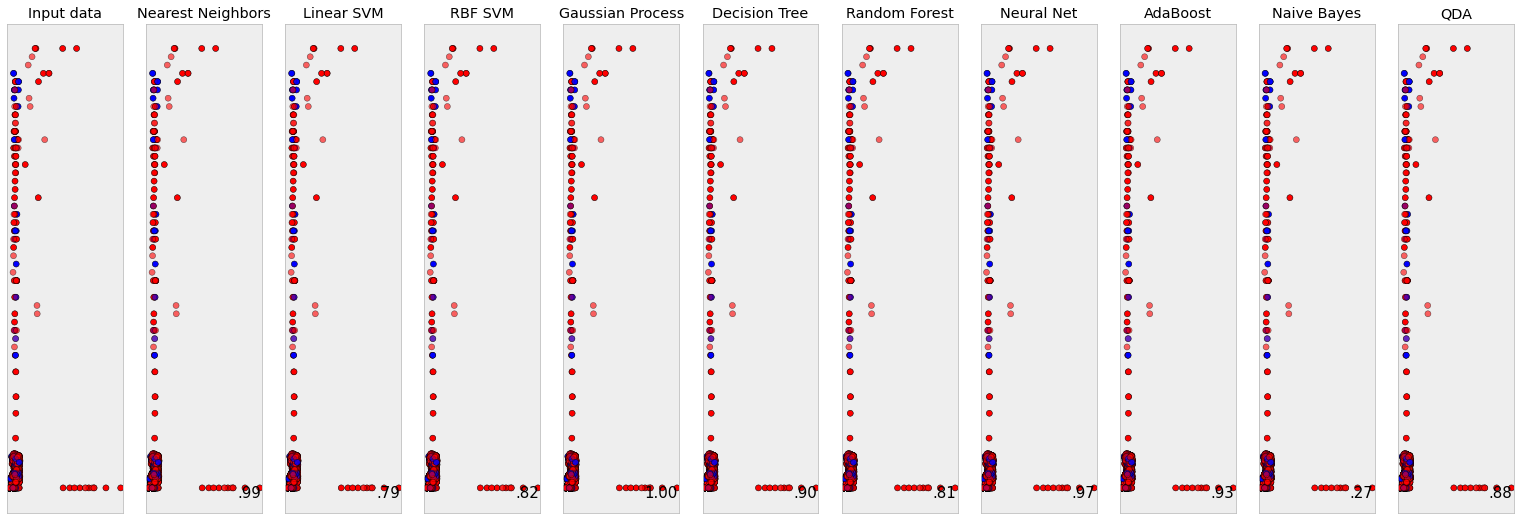

In [655]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


datasets = [
    (time_transformed_df.iloc[:,:-1], time_transformed_df.iloc[:,-1])
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f'Score: {score}, classifier: {name}')
        
        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1


plt.show()

In [658]:
time_transformed_df

,Balloon Wind Speed,Balloon Precipitable Water,Sum of Lightning Strike Signals,Count of Lightning Strikes,Altitude Height: 5000 m Speed (m/s),Altitude Height: 5000 m Shear,Altitude Height: 5000 m WW?,Altitude Height: 5000 m Direction (var),Altitude Height: 8000 m Speed (m/s),Altitude Height: 8000 m Shear,...,Altitude Height: 14000 m Direction (var),Altitude Height: 17000 m Speed (m/s),Altitude Height: 17000 m Shear,Altitude Height: 17000 m WW?,Altitude Height: 17000 m Direction (var),Altitude Height: 170000 m Speed (m/s),Altitude Height: 170000 m Shear,Altitude Height: 170000 m WW?,Altitude Height: 170000 m Direction (var),scrub
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2015-03-01 23:50:00,0.981040,0.475885,0.0,0.0,1.987874,-3.729701,-2.525729,-0.903915,2.815409,-4.017384,...,-6.122230,3.681351,-3.442019,-1.347074,-4.549838,3.144152,-3.442019,-1.609438,-3.366268,0
2015-03-01 23:55:00,0.981040,0.475885,0.0,0.0,1.916923,-3.729701,-1.897120,-0.976825,2.803360,-3.575551,...,-5.965565,3.653252,-3.506558,-1.832581,-4.524993,3.152736,-3.473768,-0.776529,-3.276512,0
2015-03-02 00:00:00,0.981040,0.475885,0.0,0.0,1.871802,-3.912023,-1.714798,-0.827660,2.785011,-3.963316,...,-5.850238,3.671225,-3.381395,-1.660731,-4.498612,3.152736,-3.506558,-0.776529,-3.416041,0
2015-03-02 00:05:00,0.981040,0.475885,0.0,0.0,1.987874,-4.199705,-1.386294,-0.685274,2.803360,-3.863233,...,-5.754857,3.666122,-3.244194,-1.514128,-4.615330,3.169686,-3.506558,-1.021651,-3.399863,0
2015-03-02 00:10:00,0.981040,0.475885,0.0,0.0,2.014903,-4.342806,-1.771957,-0.739459,2.785011,-4.074542,...,-5.709670,3.671225,-3.244194,-2.120264,-4.604634,3.173878,-3.442019,-1.714798,-3.399887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-16 09:14:00,2.406945,3.332205,0.0,0.0,1.945910,-3.863233,0.180000,-0.578761,2.091864,-4.074542,...,-4.021191,2.674149,-3.540459,-0.798508,-2.146116,2.415914,-3.270169,-0.446287,-2.385812,0
2021-10-16 09:19:00,2.251292,3.332205,0.0,0.0,1.945910,-3.912023,0.110000,-0.630241,2.104134,-4.017384,...,-3.902898,2.727853,-3.324236,-0.693147,-2.173654,2.370244,-3.540459,-0.597837,-2.638888,0
2021-10-16 09:24:00,2.091864,3.332205,0.0,0.0,2.066863,-3.688879,0.080000,-0.579619,2.041220,-3.963316,...,-3.977221,2.747271,-3.123566,-0.994252,-2.141250,2.341806,-3.540459,-0.446287,-2.043526,0


In [661]:
len(time_transformed_df.columns)

29

Feature: 0, Score: -0.00011
Feature: 1, Score: -0.00048
Feature: 2, Score: 0.10924
Feature: 3, Score: 0.26839
Feature: 4, Score: -0.05608
Feature: 5, Score: -0.01181
Feature: 6, Score: 0.00906
Feature: 7, Score: -0.00195
Feature: 8, Score: 0.11195
Feature: 9, Score: -0.01036
Feature: 10, Score: 0.03268
Feature: 11, Score: 0.01280
Feature: 12, Score: -0.02912
Feature: 13, Score: 0.03391
Feature: 14, Score: 0.01528
Feature: 15, Score: 0.13995
Feature: 16, Score: 0.02535
Feature: 17, Score: -0.01835
Feature: 18, Score: -0.01338
Feature: 19, Score: -0.29578
Feature: 20, Score: 0.13656
Feature: 21, Score: 0.00243
Feature: 22, Score: -0.05873
Feature: 23, Score: 0.00163
Feature: 24, Score: 0.07042
Feature: 25, Score: -0.08370
Feature: 26, Score: 0.04922


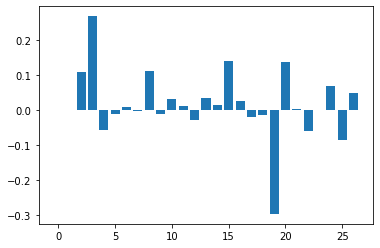

In [58]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset

# define the model
model = LinearRegression()
# fit the model
model.fit(X_train_transformed, y_train_transformed)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [51]:
time_transformed_df.columns[-1]

'scrub'

In [78]:
tuples = []
for i, x in enumerate(importance):
    tuples.append((i,x))

In [79]:
this_df = pd.DataFrame(tuples)

In [82]:
this_df.sort_values(by=1)

,0,1
19,19,-0.295784
25,25,-0.083704
22,22,-0.058727
4,4,-0.056077
12,12,-0.029121
17,17,-0.018355
18,18,-0.013385
5,5,-0.011813
9,9,-0.010357
7,7,-0.001949


In [86]:
print(time_transformed_df.columns[19],time_transformed_df.columns[3],
      time_transformed_df.columns[15],time_transformed_df.columns[20],
      time_transformed_df.columns[8],time_transformed_df.columns[9])


Altitude Height: 17000  m Speed (m/s) Altitude Height: 5000  m Speed (m/s) Altitude Height: 14000  m Speed (m/s) Altitude Height: 17000  m Shear Altitude Height: 8000  m Shear Altitude Height: 8000  m WW?


In [88]:
time_transformed_df.columns

Index(['Field Mill Mean', 'Sum of Lightning Strike Signals',
       'Count of Lightning Strikes', 'Altitude Height: 5000  m Speed (m/s)',
       'Altitude Height: 5000  m Shear', 'Altitude Height: 5000  m WW?',
       'Altitude Height: 5000  m Direction (var)',
       'Altitude Height: 8000  m Speed (m/s)',
       'Altitude Height: 8000  m Shear', 'Altitude Height: 8000  m WW?',
       'Altitude Height: 8000  m Direction (var)',
       'Altitude Height: 11000  m Speed (m/s)',
       'Altitude Height: 11000  m Shear', 'Altitude Height: 11000  m WW?',
       'Altitude Height: 11000  m Direction (var)',
       'Altitude Height: 14000  m Speed (m/s)',
       'Altitude Height: 14000  m Shear', 'Altitude Height: 14000  m WW?',
       'Altitude Height: 14000  m Direction (var)',
       'Altitude Height: 17000  m Speed (m/s)',
       'Altitude Height: 17000  m Shear', 'Altitude Height: 17000  m WW?',
       'Altitude Height: 17000  m Direction (var)',
       'Altitude Height: 170000  m Speed (